# Read in Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy import stats
from scipy.stats import f_oneway

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,1.282000e+03,1987.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
1,1.282000e+03,1988.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
2,1.282000e+03,1989.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
3,1.282000e+03,1989.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
4,1.282000e+03,1990.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1630250,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,Tax
1630251,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,Consulting
1630252,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,Consulting
1630253,1.274832e+14,2016.0,11-9199.02,1.0,0.0,0.0,0,0,0,Tax


In [ ]:
# we see that some CEO focus have a value of 0 and that is because we do not have data
# from that year about the CEO. Lets see how many rows have 0

filtered_rows = df[df['CEO Focus'] == '0']
filtered_rows
# 194,727 rows have 0 in CEO focus, we can drop these rows since we want to
# know how the CEO focus impacts exit, lateral, promotion, and demotion

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,1.282000e+03,1987.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
1,1.282000e+03,1988.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
2,1.282000e+03,1989.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
3,1.282000e+03,1989.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
4,1.282000e+03,1990.0,13-2011.01,0.0,1.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1630216,1.157322e+14,1987.0,13-1031.00,0.0,1.0,0.0,0,0,0,0
1630217,5.190038e+13,1992.0,13-1111.00,0.0,1.0,0.0,0,0,0,0
1630234,6.416681e+13,1993.0,15-1121.00,0.0,1.0,0.0,0,0,0,0
1630243,1.195289e+14,1988.0,13-2011.00,0.0,1.0,0.0,0,0,0,0


In [ ]:
# drop rows
filtered_rows = df[df['CEO Focus'] != '0']  # Keep rows where 'CEO Focus' is not equal to '0'
df = filtered_rows
df # should have 1,630,255  - 194,727 = 1,435,528 rows, which we do so this is good

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
5,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
6,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
7,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
8,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
9,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,Consulting
...,...,...,...,...,...,...,...,...,...,...
1630249,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,Consulting
1630250,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,Tax
1630251,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,Consulting
1630252,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,Consulting


In [ ]:
# save new clean df to csv file
# save transitsions df
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_clean_master_dataset.csv'
df.to_csv(file_path, index=False)

In [ ]:
# reread clean df back in
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_clean_master_dataset.csv'
df = pd.read_csv(file_path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,Consulting
...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,Consulting
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,Tax
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,Consulting
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,Consulting


# Analysis

In [ ]:
# Calculate mean values of numerical variables grouped by 'CEO Focus' to understand the relationship
# between a categorical variable like 'CEO Focus' and numerical variables like 'Exit', 'Lateral', 'Promotion',
# and 'Demotion'

# calculate the mean values of numerical variables grouped by different categories of 'CEO Focus' to
# see if there are any differences in the means across the categories
mean_values = df.groupby('CEO Focus')[['Exit', 'Lateral', 'Promotion', 'Demotion']].mean()
mean_values

,Exit,Lateral,Promotion,Demotion
CEO Focus,,,,
Audit,0.165595,0.066634,0.022342,0.016269
Consulting,0.054202,0.047586,0.011347,0.012760
Tax,0.029201,0.068437,0.012718,0.017472


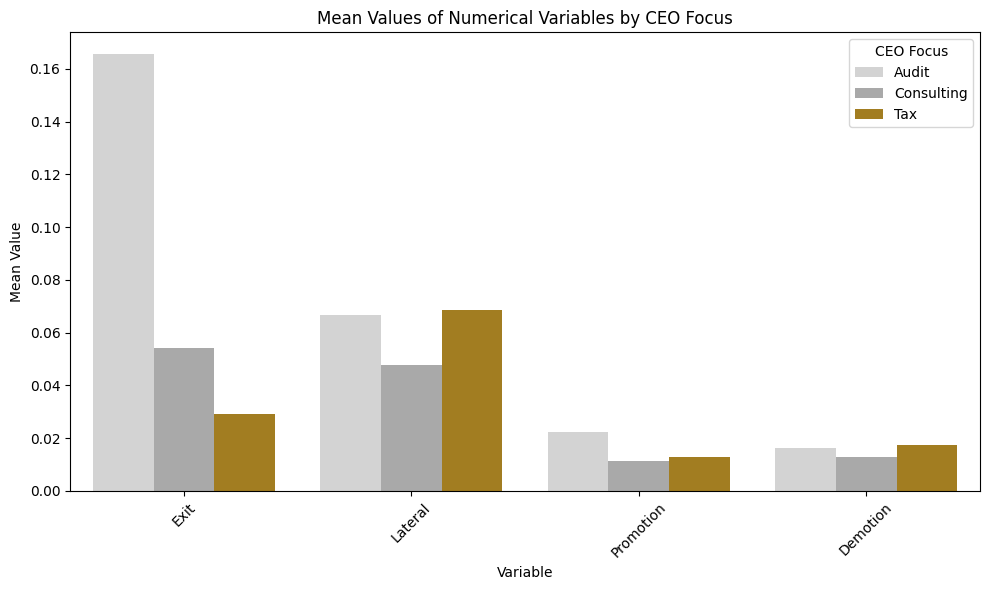

In [ ]:
# Visual display of the chart from previous code chunk
custom_palette = ['#D3D3D3', '#A9A9A9', '#B8860B']  # Light gray, gray, and dark gold

# reset the index to make 'CEO Focus' a column
mean_values.reset_index(inplace=True)

# melt the df to long format to plot easier
mean_values_long = pd.melt(mean_values, id_vars='CEO Focus', var_name='Variable', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_long, x='Variable', y='Mean Value', hue='CEO Focus', palette=custom_palette)
plt.title('Mean Values of Numerical Variables by CEO Focus')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='CEO Focus')
plt.tight_layout()
plt.show()

## Time Series

<ipython-input-10-08896a69c939>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


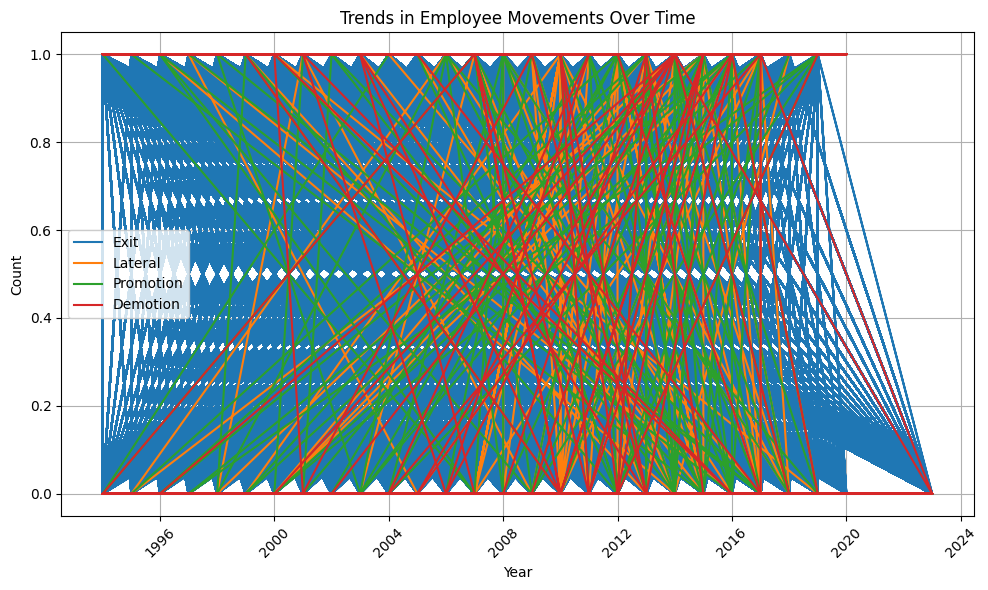

In [ ]:
# convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# plot trends of Exit, Lateral, Promotion, and Demotion over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Exit'], label='Exit')
plt.plot(df['Year'], df['Lateral'], label='Lateral')
plt.plot(df['Year'], df['Promotion'], label='Promotion')
plt.plot(df['Year'], df['Demotion'], label='Demotion')
plt.title('Trends in Employee Movements Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hard to read, retry another graph approach

<Figure size 1000x600 with 0 Axes>

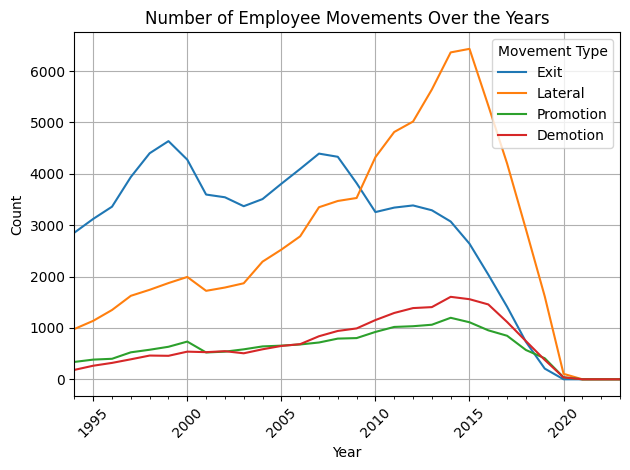

In [ ]:
# group the data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')
plt.title('Number of Employee Movements Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Movement Type')
plt.show()

Add a vertical line when a new ceo comes in.

In [ ]:
# Read in ceo data to try and add to plot
# File path
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Big 4 CEO Dataset.xlsx'
ceo = pd.read_excel(file_path)
ceo

,Name,Firm,Tenure Start,Tenure End,Tenure Years,Employment History (Audit or Consulting),Terms
0,Joe Ucuzoglu,Deloitte,2022,2023,1,Audit,1
1,Punit Renjen,Deloitte,2015,2022,8,Consulting,2
2,Barry Salzberg,Deloitte,2011,2015,4,Tax,1
3,James Quigley,Deloitte,2007,2011,4,Audit,1
4,William Parrett,Deloitte,2003,2007,4,Audit,1
5,James Copeland,Deloitte,1999,2003,4,Audit,1
6,William Thomas,KPMG,2017,2023,6,Audit,2
7,John Veihmeyer,KPMG,2014,2017,3,Audit,1
8,Michael Andrew,KPMG,2011,2014,3,Tax,1
9,Timothy Flynn,KPMG,2007,2011,3,Audit,1


In [ ]:
# only want EY ceo data
ceo_ey = ceo[ceo['Firm'] == 'EY']
ceo_ey

,Name,Firm,Tenure Start,Tenure End,Tenure Years,Employment History (Audit or Consulting),Terms
12,Carmine Di Sibio,EY,2019,2023,5,Consulting,1
13,Mark Weinberger,EY,2013,2019,6,Tax,1
14,Jim Turley,EY,2001,2013,12,Consulting,2
15,Philip Laskawy,EY,1994,2001,6,Audit,1


<Figure size 1000x600 with 0 Axes>

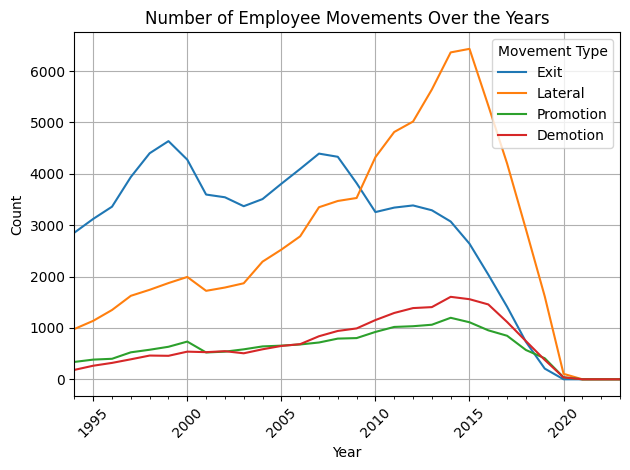

In [ ]:
# group the data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')
plt.title('Number of Employee Movements Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# add vertical lines for CEO tenure start and note of what focus they are
for idx, row in ceo_ey.iterrows():
    plt.axvline(x=row['Tenure Start'], color='black', linestyle='--', linewidth=1)
    #plt.text(row['Tenure Start'], 100, row['Employment History (Audit or Consulting)'], rotation=90, va='bottom')

plt.legend(title='Movement Type')
plt.show()

12
Name                                        Carmine Di Sibio
Firm                                                      EY
Tenure Start                                            2019
Tenure End                                              2023
Tenure Years                                               5
Employment History (Audit or Consulting)          Consulting
Terms                                                      1
Name: 12, dtype: object
13
Name                                        Mark Weinberger
Firm                                                     EY
Tenure Start                                           2013
Tenure End                                             2019
Tenure Years                                              6
Employment History (Audit or Consulting)                Tax
Terms                                                     1
Name: 13, dtype: object
14
Name                                        Jim Turley
Firm                                     

<Figure size 1000x600 with 0 Axes>

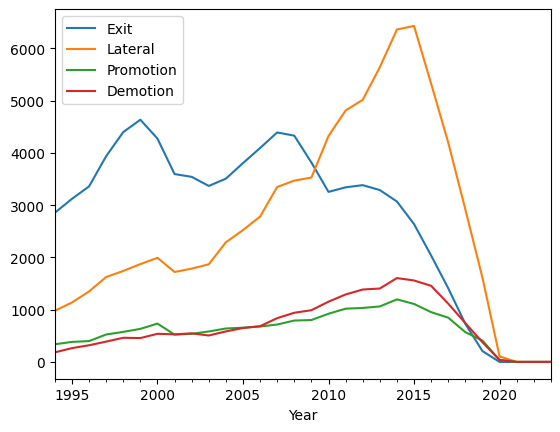

In [ ]:
# group the movement data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')

# add vertical lines for when CEO changes
for index, row in ceo_ey.iterrows():
    plt.axvline(x=row['Tenure Start'], color='red', linestyle='--', label='CEO Change' if index == 0 else None)
    print(index)
    print(row)

#plt.title('Number of Employee Movements Over the Years with CEO Changes')
#plt.xlabel('Year')
#plt.ylabel('Count')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.legend(title='Movement Type')
#plt.show()

<Figure size 1000x600 with 0 Axes>

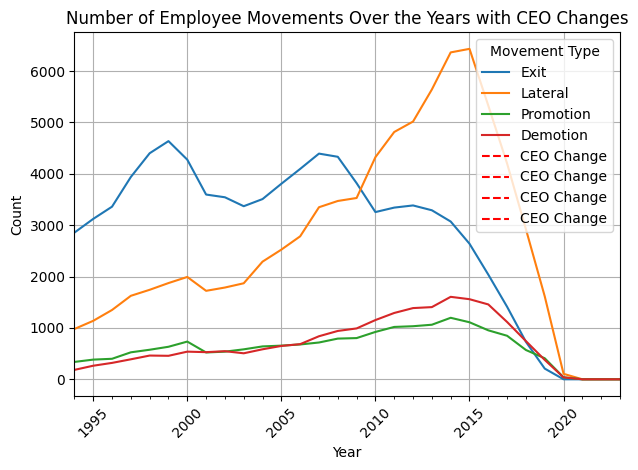

In [ ]:
# group the movement data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')

# add vertical lines for when CEO changes
for index, row in ceo_ey.iterrows():
    plt.axvline(x=row['Tenure Start'], color='red', linestyle='--', label='CEO Change')

plt.title('Number of Employee Movements Over the Years with CEO Changes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Movement Type')
plt.show()

Need to fix this chart. Not producing correct outcome. Want to see vertical lines for the years a new CEO comes in.

## ANOVA (Group Differences)

In [ ]:
# anova tests to see if differences between CEO focus on promotion, exit, demotion, and lateral moves

# group by CEO Focus
grouped = df.groupby('CEO Focus')

# calculate proportions
proportions = grouped[['Exit', 'Promotion', 'Lateral', 'Demotion']].mean()

# one-way ANOVA for each column
for column in proportions.columns:
    print(f"\n\nOne-way ANOVA for {column}:\n")
    # get data for each CEO Focus group
    group_data = [grouped.get_group(focus)[column] for focus in proportions.index]
    # perform one-way ANOVA
    f_stat, p_value = f_oneway(*group_data)
    print(f"One-way ANOVA for {column}: F-statistic={f_stat}, p-value={p_value}")



One-way ANOVA for Exit:

One-way ANOVA for Exit: F-statistic=20860.957081206947, p-value=0.0


One-way ANOVA for Promotion:

One-way ANOVA for Promotion: F-statistic=635.3021587568159, p-value=1.636105565666434e-276


One-way ANOVA for Lateral:

One-way ANOVA for Lateral: F-statistic=1378.839784300405, p-value=0.0


One-way ANOVA for Demotion:

One-way ANOVA for Demotion: F-statistic=241.23504861143599, p-value=1.7805384052613517e-105


## Rolling Frequencies

In [ ]:
# After 3,4, or 6 months after a new CEO comes in look at how many people are classifying as consulting or auditing AND
# look at how many people have a promotion, exit, demotion, or lateral move.

# get CEO tenure start years
ceo_tenure_start_years = ceo_ey['Tenure Start']

# define the months after CEO tenure start
months_after_ceo_tenure = [3, 4, 6]

# analyze movements (promotion, demotion, exit, lateral) after 3,4,6 months for each CEO
# rolling counts
for tenure_start_year in ceo_tenure_start_years:
    print("\n")
    print(f"Analysis after CEO tenure start in {tenure_start_year}:")
    for months in months_after_ceo_tenure:
        end_year = tenure_start_year + (months // 12)
        end_month = (tenure_start_year % 12) + (months % 12)
        if end_month > 12:
            end_year += 1
            end_month -= 12

        filtered_data = df[(df['Year'].dt.year > tenure_start_year) & (df['Year'].dt.year <= end_year)]

        promotions = filtered_data['Promotion'].sum()
        exits = filtered_data['Exit'].sum()
        demotions = filtered_data['Demotion'].sum()
        lateral_moves = filtered_data['Lateral'].sum()

        consulting_count = filtered_data[filtered_data['CEO Focus'] == 'Consulting'].shape[0]
        audit_count = filtered_data[filtered_data['CEO Focus'] == 'Audit'].shape[0]

        print(f"After {months} months:")
        print("---------------")
        print(f"Promotions: {promotions}")
        print(f"Exits: {exits}")
        print(f"Demotions: {demotions}")
        print(f"Lateral Moves: {lateral_moves}")
        print(f"Consulting Count: {consulting_count}")
        print(f"Audit Count: {audit_count}")
        print("\n")



Analysis after CEO tenure start in 2019:
After 3 months:
---------------
Promotions: 0
Exits: 0.0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0


After 4 months:
---------------
Promotions: 0
Exits: 0.0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0


After 6 months:
---------------
Promotions: 0
Exits: 0.0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0




Analysis after CEO tenure start in 2013:
After 3 months:
---------------
Promotions: 0
Exits: 0.0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0


After 4 months:
---------------
Promotions: 1197
Exits: 3071.0
Demotions: 1605
Lateral Moves: 6363
Consulting Count: 0
Audit Count: 0


After 6 months:
---------------
Promotions: 1197
Exits: 3071.0
Demotions: 1605
Lateral Moves: 6363
Consulting Count: 0
Audit Count: 0




Analysis after CEO tenure start in 2001:
After 3 months:
---------------
Promotions: 0
Exits: 0.0
Demotions: 0
Lateral Moves: 0
Consulting Count

# Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# Need to reread df in so have all columns
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_clean_master_dataset.csv'
df = pd.read_csv(path)
df # should have 1,435,528 rows

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,Consulting
...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,Consulting
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,Tax
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,Consulting
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,Consulting


In [ ]:
# need to create an indictor if it is a lateral move within EY so this means
# exit = 0 and lateral = 1 at the same time
def calc_lateral_within(row):
    if row['Exit'] == 0 and row['Lateral'] == 1:
        return 1
    else:
        return 0

df['lateral_within'] = df.apply(calc_lateral_within, axis=1)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus,lateral_within
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,Consulting,0
...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,Consulting,0
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,Consulting,0


In [ ]:
# create another indicator variable (0/1), where the variable takes the value
# of one if the employee and CEO share the same focus, zero otherwise.

# function to apply to each row
def create_shared_column(row):
    if row['Audit_History'] == 1 and row['CEO Focus'] == 'Audit':
        return 1
    elif row['Consult_History'] == 1 and row['CEO Focus'] == 'Consulting':
        return 1
    else:
        return 0

df['Shared_Focus'] = df.apply(create_shared_column, axis=1)
df.head()

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus,lateral_within,Shared_Focus
0,1406.0,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0,0
1,1406.0,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0,0
2,1406.0,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0,0
3,1406.0,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,Consulting,0,0
4,4694.0,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,Consulting,0,1


In [ ]:
# rearrange order of columns
desired_column_order = ['ID', 'Year','ONET', 'Audit_History', 'Consult_History', 'Exit', 'Lateral', 'Promotion', 'Demotion','lateral_within', 'CEO Focus','Shared_Focus']
df = df[desired_column_order]
df # inspect df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
df_consult = df[df['Consult_History'] == 1]
df_consult
# validate the fuction worked good, yes all good

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
5,4.694000e+03,2004.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
6,4.694000e+03,2005.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
7,4.694000e+03,2006.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
59,8.589938e+09,2013.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Tax,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435519,8.032448e+13,2013.0,13-1051.00,0.0,1.0,0.0,0,0,0,0,Tax,0
1435521,8.583922e+13,2016.0,13-1031.00,0.0,1.0,0.0,0,0,0,0,Tax,0
1435522,1.329980e+14,2000.0,13-1031.00,0.0,1.0,0.0,0,0,0,0,Audit,0
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1


In [ ]:
# save to df to csv file so no need to rerun all above cells
csv_file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
# make sure data in right data type to do regression
df.dtypes

ID                 float64
Year               float64
ONET                object
Audit_History      float64
Consult_History    float64
Exit               float64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
# Getting error when doing regression so need to change data type for ONET because needs to be numeric
# Remove non-numeric characters from the onet column
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

df.dtypes # sanity check

ID                 float64
Year               float64
ONET               float64
Audit_History      float64
Consult_History    float64
Exit               float64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13201101.0,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13201101.0,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13201101.0,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13201101.0,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13201101.0,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13209902.0,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15112100.0,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15203100.0,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13119901.0,0.0,1.0,1.0,0,0,0,0,Consulting,1


## Exit

The regression in mind is: Exit indicator = intercept + same focus + Fixed Effects. The fixed effects would include: 1) occupation and 2) year. Will leave everything at the individual-year level at this point because we may want to try individual fixed effects as well. Also double-clustered the standard errors at the occupation and year levels. After running it with the exit indicator as the dependent variable, we will also see what happens with Promotion, Lateral, Demotion, and Lateral-within.  

In [ ]:
import statsmodels.api as sm

In [ ]:
# Generate dummy variables for fixed effects
fe_dummies_exit = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_exit = pd.concat([df[['Shared_Focus']], fe_dummies_exit], axis=1)

# Add a constant to the model
X_exit = sm.add_constant(X_exit)

# Dependent variable
Y_exit= df['Exit']

# Fit the OLS model
model_exit = sm.OLS(Y_exit, X_exit)

#results_exit = model_exit.fit(cov_type='cluster', cov_kwds={'groups_exit': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_exit = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_exit = model_exit.fit(cov_type='cluster', cov_kwds={'groups': groups_exit})
# results_exit = model_exit.fit() # since clustering was not working just fit the model without clustering

results_exit.summary()

# The coefficient for the Shared_Focus variable is 0.0039, with a p-value of 0.612.
# This suggests that there is no statistically significant relationship between
# CEO shared focus and the likelihood of exit within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     37.75
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.05e-16
Time:                        03:52:14   Log-Likelihood:                 40439.
No. Observations:             1435528   AIC:                        -8.087e+04
Df Residuals:                 1435524   BIC:                        -8.082e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.387e-06   1.06e-05      0.509      0.611   -1.53e-05    2.61e-05
Shared_Focus     0.0039      0.008      0.508      0.612      -0.011       0.019
ID            8.349e-17   1.26e-17      6.644      0.000    5.89e-17    1.08e-16
ONET         -8.098e-10   2.91e-10     -2.782      0.005   -1.38e-09   -2.39e-10
Year           3.21e-05   4.34e-06      7.395      0.000    2.36e-05    4.06e-05
==============================================================================
Omnibus:                  1067851.573   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12056990.032
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      15.057   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.5e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lateral

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

df.dtypes # sanity check

ID                 float64
Year               float64
ONET               float64
Audit_History      float64
Consult_History    float64
Exit               float64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
# Running the regression: Lateral = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_lateral = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_lateral = pd.concat([df[['Shared_Focus']], fe_dummies_lateral], axis=1)

# Add a constant to the model
X_lateral = sm.add_constant(X_lateral)

# Dependent variable
Y_lateral = df['Lateral']

# Fit the OLS model
model_lateral = sm.OLS(Y_lateral, X_lateral)
#results_lateral = model_lateral.fit(cov_type='cluster', cov_kwds={'groups_lateral': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_lateral = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_lateral = model_lateral.fit(cov_type='cluster', cov_kwds={'groups': groups_lateral})
# results_lateral = model_lateral.fit() # since clustering was not working just fit the model without clustering

results_lateral.summary()

# The coefficient for the Shared_Focus variable is -0.0051, with a p-value of 0.370.
# This suggests that there is no statistically significant relationship between
# CEO shared focus and the likelihood of lateral movement within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lateral   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.31e-85
Time:                        03:53:17   Log-Likelihood:                 77354.
No. Observations:             1435528   AIC:                        -1.547e+05
Df Residuals:                 1435524   BIC:                        -1.547e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.009e-06   7.82e-06     -0.896      0.370   -2.23e-05    8.32e-06
Shared_Focus    -0.0051      0.006     -0.896      0.370      -0.016       0.006
ID            -1.06e-16   1.04e-17    -10.232      0.000   -1.26e-16   -8.57e-17
ONET          5.011e-09   4.88e-10     10.260      0.000    4.05e-09    5.97e-09
Year         -2.949e-06    4.2e-06     -0.703      0.482   -1.12e-05    5.28e-06
==============================================================================
Omnibus:                  1084489.503   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13054736.879
Skew:                           3.800   Prob(JB):                         0.00
Kurtosis:                      15.669   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.5e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Promotion

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

# df.dtypes # sanity check

In [ ]:
# Running the regression: Promotion = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_promo = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_promo = pd.concat([df[['Shared_Focus']], fe_dummies_promo], axis=1)

# Add a constant to the model
X_promo = sm.add_constant(X_promo)

# Dependent variable
Y_promo = df['Promotion']

# Fit the OLS model
model_promo = sm.OLS(Y_promo, X_promo)
#results_promo = model_promo.fit(cov_type='cluster', cov_kwds={'groups_promo': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_promo = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_promo = model_promo.fit(cov_type='cluster', cov_kwds={'groups': groups_promo})
# results_promo = model_promo.fit() # since clustering was not working just fit the model without clustering

results_promo.summary()

# The coefficient for the Shared_Focus variable is 0.0058, with a p-value of 0.007.
# This suggests that there is a statistically significant relationship between CEO
# shared focus and the likelihood of promotion within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Promotion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.893
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0208
Time:                        03:54:15   Log-Likelihood:             1.0903e+06
No. Observations:             1435528   AIC:                        -2.181e+06
Df Residuals:                 1435524   BIC:                        -2.181e+06
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.918e-06   2.95e-06      2.683      0.007    2.13e-06    1.37e-05
Shared_Focus     0.0058      0.002      2.683      0.007       0.002       0.010
ID           -1.299e-17   3.21e-18     -4.047      0.000   -1.93e-17    -6.7e-18
ONET           8.71e-10   8.79e-11      9.911      0.000    6.99e-10    1.04e-09
Year         -1.371e-07   8.96e-07     -0.153      0.878   -1.89e-06    1.62e-06
==============================================================================
Omnibus:                  2000173.281   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        324726601.824
Skew:                           8.575   Prob(JB):                         0.00
Kurtosis:                      74.658   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.5e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Demotion

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

# df.dtypes # sanity check

In [ ]:
# Running the regression: Demotion = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_demo = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_demo = pd.concat([df[['Shared_Focus']], fe_dummies_demo], axis=1)

# Add a constant to the model
X_demo = sm.add_constant(X_demo)

# Dependent variable
Y_demo= df['Demotion']

# Fit the OLS model
model_demo = sm.OLS(Y_demo, X_demo)
#results_demo = model_demo.fit(cov_type='cluster', cov_kwds={'groups_demo': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_demo = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_demo = model_demo.fit(cov_type='cluster', cov_kwds={'groups': groups_demo})
# results_demo = model_demo.fit() # since clustering was not working just fit the model without clustering

results_demo.summary()

# The coefficient for the Shared_Focus variable is 0.0012, with a p-value of 0.555.
# This suggests that there is no statistically significant relationship between
# CEO shared focus and the likelihood of demotion within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Demotion   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     44.45
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.61e-19
Time:                        03:54:45   Log-Likelihood:             1.0065e+06
No. Observations:             1435528   AIC:                        -2.013e+06
Df Residuals:                 1435524   BIC:                        -2.013e+06
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.702e-06   2.88e-06      0.592      0.554   -3.93e-06    7.34e-06
Shared_Focus     0.0012      0.002      0.590      0.555      -0.003       0.005
ID           -2.038e-17   4.33e-18     -4.707      0.000   -2.89e-17   -1.19e-17
ONET         -7.809e-10   1.21e-10     -6.436      0.000   -1.02e-09   -5.43e-10
Year          1.285e-05   1.48e-06      8.701      0.000    9.95e-06    1.57e-05
==============================================================================
Omnibus:                  1926947.917   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        254684834.467
Skew:                           8.072   Prob(JB):                         0.00
Kurtosis:                      66.224   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.5e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lateral-Within

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/EY/ey_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,1.406000e+03,2007.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
1,1.406000e+03,2008.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
2,1.406000e+03,2009.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
3,1.406000e+03,2010.0,13-2011.01,1.0,0.0,0.0,0,0,0,0,Consulting,0
4,4.694000e+03,2003.0,13-2011.01,0.0,1.0,0.0,0,0,0,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1435523,1.052868e+14,2008.0,13-2099.02,0.0,1.0,0.0,0,0,0,0,Consulting,1
1435524,1.087743e+14,2013.0,15-1121.00,1.0,0.0,0.0,0,0,0,0,Tax,0
1435525,1.095388e+14,2002.0,15-2031.00,1.0,0.0,0.0,0,0,0,0,Consulting,0
1435526,1.239613e+14,2012.0,13-1199.01,0.0,1.0,1.0,0,0,0,0,Consulting,1


In [ ]:
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')
df['ONET'] = df['ONET'].astype('float64')

In [ ]:
# Running the regression: Lateral-WithIn = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_latIn = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_latIn = pd.concat([df[['Shared_Focus']], fe_dummies_latIn], axis=1)

# Add a constant to the model
X_latIn = sm.add_constant(X_latIn)

# Dependent variable
Y_latIn= df['lateral_within']

# Fit the OLS model
model_latIn = sm.OLS(Y_latIn, X_latIn)
groups_latIn = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_latIn = model_latIn.fit(cov_type='cluster', cov_kwds={'groups': groups_latIn})

results_latIn.summary()

# The coefficient for the Shared_Focus variable is -0.0043, with a p-value of
# 0.394. This suggests that there is no statistically significant relationship
# between CEO shared focus and lateral movements within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lateral_within   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.17e-84
Time:                        03:55:58   Log-Likelihood:             1.5866e+05
No. Observations:             1435528   AIC:                        -3.173e+05
Df Residuals:                 1435524   BIC:                        -3.173e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.854e-06   6.87e-06     -0.852      0.394   -1.93e-05    7.61e-06
Shared_Focus    -0.0043      0.005     -0.852      0.394      -0.014       0.006
ID           -1.153e-16   1.05e-17    -10.989      0.000   -1.36e-16   -9.47e-17
ONET          4.932e-09   4.77e-10     10.340      0.000       4e-09    5.87e-09
Year         -5.474e-06   3.89e-06     -1.408      0.159   -1.31e-05    2.15e-06
==============================================================================
Omnibus:                  1156593.956   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17175419.112
Skew:                           4.072   Prob(JB):                         0.00
Kurtosis:                      17.860   Cond. No.                     1.50e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.5e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Overall
Statistically significant: p value < 0.05

*   Promotion (positive)

NOT significant: p value > 0.05

*   Exit
*   Lateral
*   Demotion
*   Lateral Within





